<a href="https://colab.research.google.com/github/ThanhQuynh0202/VoNgocThanhQuynh_20104053_BTVN/blob/main/Nhan_dien_gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Nhận diện Gạo
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd "/content/drive/My Drive/Colab Notebooks/BTVN/Gao"

/content/drive/My Drive/Colab Notebooks/BTVN/Gao


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Gao/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1569 images belonging to 5 classes.


In [6]:
validation=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Gao/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 462 images belonging to 5 classes.


In [7]:
training_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [8]:
validation.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
50/50 [==============================] - 513s 10s/step - loss: 1.1528 - accuracy: 0.6214 - val_loss: 0.5466 - val_accuracy: 0.7554
Epoch 2/50
50/50 [==============================] - 16s 319ms/step - loss: 0.5077 - accuracy: 0.7992 - val_loss: 0.3572 - val_accuracy: 0.8745
Epoch 3/50
50/50 [==============================] - 15s 301ms/step - loss: 0.3457 - accuracy: 0.8783 - val_loss: 0.2691 - val_accuracy: 0.8983
Epoch 4/50
50/50 [==============================] - 15s 300ms/step - loss: 0.3164 - accuracy: 0.8891 - val_loss: 0.1596 - val_accuracy: 0.9437
Epoch 5/50
50/50 [==============================] - 15s 296ms/step - loss: 0.1892 - accuracy: 0.9273 - val_loss: 0.1312 - val_accuracy: 0.9545
Epoch 6/50
50/50 [==============================] - 17s 350ms/step - loss: 0.2193 - accuracy: 0.9318 - val_loss: 0.2265 - val_accuracy: 0.9156
Epoch 7/50
50/50 [==============================] - 15s 295ms/step - loss: 0.2177 - accuracy: 0.9229 - val_loss: 0.1758 - val_accuracy: 0.9351


In [11]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.03485909476876259
Train Accuracy 0.9866156578063965


<function matplotlib.pyplot.show(*args, **kw)>

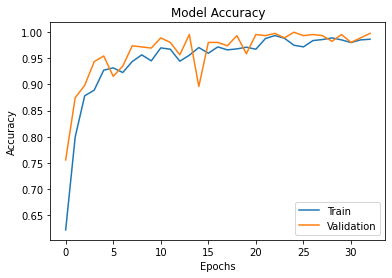

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
model.save("Gao.h5")

In [14]:
model_CNN=load_model('Gao.h5')

1/1 [==============================] - 0s 112ms/step
Arborio


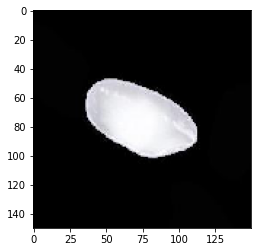

1/1 [==============================] - 0s 18ms/step
Jasmine


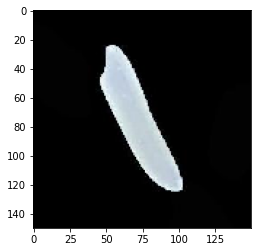

1/1 [==============================] - 0s 20ms/step
Ipsala


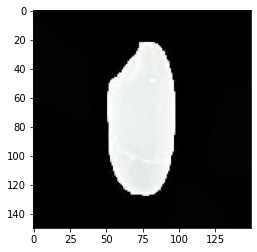

1/1 [==============================] - 0s 15ms/step
Jasmine


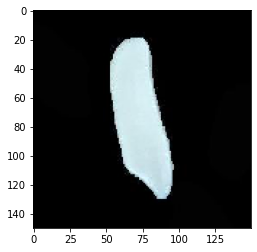

1/1 [==============================] - 0s 17ms/step
Karacadag


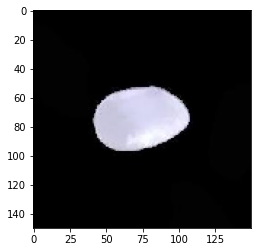

In [15]:
test="/content/drive/My Drive/Colab Notebooks/BTVN/Gao/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Arborio'
  if round(result[0][1])==1:
    prediction='Basmati'
  if round(result[0][2])==1:
    prediction='Ipsala'
  if round(result[0][3])==1:
    prediction='Jasmine'
  if round(result[0][4])==1:
    prediction='Karacadag'
  print(prediction)
  plt.show()